In [1]:
!pip install roboflow
import glob
import cv2
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=e75805972c8edd906924de3cc188a73ca9cf726b6958c0c8b0b6522814f35956
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import io
import sys
import os.path
import urllib.request
from tqdm import tqdm
from os import listdir
from PIL import Image
import glob

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from keras import models
from keras import layers
from keras import optimizers
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from statistics import mean
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
#mytorch
!pip install roboflow
from roboflow import Roboflow
# rf = Roboflow(api_key="kett4k6UwxbLJXPYqbay")
# project = rf.workspace().project("classification-of-disaster-events")
# model1 = project.version(1).model

rf = Roboflow(api_key="kett4k6UwxbLJXPYqbay")
project = rf.workspace().project("face-detection-mik1i")
model2 = project.version(21).model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


**OUTPUT**

In [6]:
# load json and create model
from __future__ import division
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import numpy as np
import cv2
import random

In [7]:
!unzip /content/drive/MyDrive/drive-models.zip

Archive:  /content/drive/MyDrive/drive-models.zip
   creating: drive-models/
  inflating: __MACOSX/._drive-models  
  inflating: drive-models/.DS_Store  
  inflating: __MACOSX/drive-models/._.DS_Store  
  inflating: drive-models/vgg.h5     
  inflating: __MACOSX/drive-models/._vgg.h5  
  inflating: drive-models/resnet.h5  
  inflating: __MACOSX/drive-models/._resnet.h5  


In [21]:
from keras.models import load_model
# Load fer(1).json
json_file = open('/content/drive/MyDrive/Final Year Project - Disaster Image Emotion/fer (1).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Load fer(1).h5
loaded_model.load_weights("/content/drive/MyDrive/Final Year Project - Disaster Image Emotion/fer (1).h5")

# load vgg.h5
modelvgg = load_model('/content/drive-models/vgg.h5')

# Load resnet.h5
modelres = load_model('/content/drive-models/resnet.h5')

# Load model1.h5
modelwhole =load_model('/content/drive/MyDrive/model1.h5')
lisd = []

In [19]:
from __future__ import division
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import numpy as np
import cv2

def getFacialPrediction(file,size,modelname):

  WIDTH = 48
  HEIGHT = 48
  x=None
  y=None
  labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
  full_size_image = cv2.imread(file)
  # print("Image Loaded")
    
  if(size==48):
    gray=cv2.cvtColor(full_size_image,cv2.COLOR_RGB2GRAY)
  else:  
    gray = full_size_image
 
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(gray, (size, size)), -1), 0)
  cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)       
  if(modelname=='loaded_model'):
    yhat = loaded_model.predict(cropped_img)
  elif(modelname=='vgg'):
    yhat = modelvgg.predict(cropped_img)
  else:
    yhat = modelres.predict(cropped_img)
  # cv2.putText(full_size_image, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
  # print("Emotion: "+labels[int(np.argmax(yhat))])
  return labels[int(np.argmax(yhat))],max(yhat[0])
  

In [10]:
def allMajority(allpred):
  freq = {}
  for item in allpred:
    if (item in freq):
      freq[item] += 1
    else:
      freq[item] = 1
  max = 0
  key1 = ""
  for key, value in freq.items():
    if(value>max):
      max = value
      key1 = key
  count = 0
  for key, value in freq.items():
    if(value==max):
      count = count+1

  # if(count>1):
  #   print("No dominant emotion found")
  # else:
  #   print("Dominant emotion:"+key1)      

In [11]:
def majorityforface(pred1,pred2,pred3):
  dict1 = {}
  if(pred1!=-1):
    if (pred1 in dict1):
      dict1[pred1] += 1
    else:
      dict1[pred1] = 1
  if(pred2!=-1):    
    if (pred2 in dict1):
      dict1[pred2] += 1
    else:
      dict1[pred2] = 1  
  if(pred3!=-1):    
    if (pred3 in dict1):
      dict1[pred3] += 1
    else:
      dict1[pred3] = 1
  max = 0
  key1 = ""
  for key, value in dict1.items():
    if(value>max):
      max = value
      key1 = key
  if(max==1):
    return pred2   
  return key1


In [12]:
def getWholePred(file):
  img = image.load_img(file,target_size=(112,112,3))
  img = image.img_to_array(img)
  img = img/255
  # classes = {'Angry':5, 'Disgust':4, 'Fear':3, 'Happy':1, 'Sad':2, 'Surprise':6, 'Neutral':7}
  classes = ['Happy', 'Sad', 'Fear', 'Disgust', 'Angry', 'Surprise', 'Neutral']
#proba = model.predict(img.reshape(1,400,400,3))
  proba = modelwhole.predict(img.reshape(1,112,112,3))
  # print(proba)
  top_3 = np.argsort(proba[0])[:-4:-1]
  
  # return "{}".format(classes[top_3[1]])+" ({:.3})".format(proba[0][top_3[1]]),max(proba[0])
  return classes[top_3[0]],max(proba[0])

In [17]:
import glob
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
from PIL import Image

def getOutput(path):
  
  !rm -rf /content/cropped
  !mkdir /content/cropped
  wholeimg = Image.open(path)
  prob = []
  label = []
  result = model2.predict(path, confidence=40, overlap=30).json()
  imagetemp = cv2.imread(path)
  num = 1
  for res in result['predictions']:
    prediction = {'x': res['x'], 'y': res['y'], 'width': res['width'], 'height': res['height']}
    roi_x = int(prediction['x'] - prediction['width'] / 2)
    roi_y = int(prediction['y'] - prediction['height'] / 2)
    roi_width = int(prediction['width'])
    roi_height = int(prediction['height'])
    # drawRect(path,prediction)
    roi = imagetemp[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]
    cv2.imwrite("/content/cropped/cropped_region"+str(num)+".jpeg", roi)
    # unblurFace("/content/cropped/cropped_region"+str(num)+".jpeg")
    # unbl("/content/cropped/cropped_region"+str(num)+".jpeg")
    num+=1
  #draw rectangle
  plt.imshow(wholeimg)
  plt.show()
  allpred = []
  #retrieve from folder
  cpath = "/content/cropped/*.*"
  img_number = 1
  img_list = glob.glob(cpath)
  for files in img_list[0:len(result['predictions'])]:
     img_path = files
     img = Image.open(files)
    #  print(img_path)
     pred1,pre1 = getFacialPrediction(img_path,48,"loaded_model") 
     pred2,pre2 = getFacialPrediction(img_path,197,"vgg")
     pred3,pre3 = getFacialPrediction(img_path,48,"res")
     
     key1 = majorityforface(pred1,pred2,pred3)
     print(key1)
     avg = 0
     count = 0
     if(key1==pred1):
       avg = avg + pre1
       count = count +1
     if(key1==pred2):
       avg = avg+pre2
       count = count+1
     if(key1==pred3):
       avg = avg+pre3 
       count = count+1
     dic = {key1:(avg/count)}
     lisd.append(dic) 
    
    #  print (pred2)  
     allpred.append(key1)
     plt.figure(figsize=(1,1))
     plt.imshow(img)
     plt.show()
  #Majority Vote algo
  allMajority(allpred)
  return 
  # print(lisd)

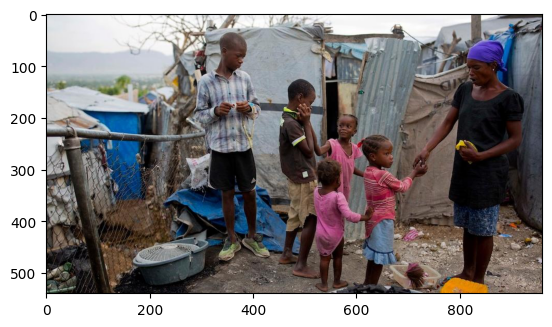

1/1 [==============================] - 0s 18ms/step
Angry


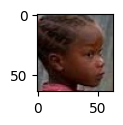

1/1 [==============================] - 0s 18ms/step
Neutral


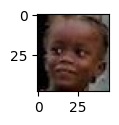

1/1 [==============================] - 0s 22ms/step
Angry


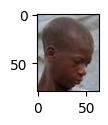

1/1 [==============================] - 0s 22ms/step
Sad


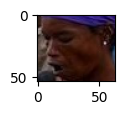

In [20]:
getOutput('/content/detcted.jpg')